In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
# import data and get relevant columns
df = pd.read_csv('raw_parsed_data_articles.csv')[['date', 'text', 'title', 'LDA_Topics', 'count_docs', 'PH_Loc']]

# remove entries without location, or PH_Loc == "['asia']"
df = df[df['PH_Loc'].str.match('(?=.*[a-z])')].reset_index(drop=True)
df = df[df['PH_Loc'] != "['asia']"]

# remove entries that don't have the word confirmed or Confirmed in the 
# text, title, LDA_Topics, or count_docs column
df = df[(df['text'].str.findall('[Cc]onfirmed').str.len() >= 1) | 
        (df['title'].str.findall('[Cc]onfirmed').str.len() >= 1) |
        (df['LDA_Topics'].str.findall('[Cc]onfirmed').str.len() >= 1) |
        (df['count_docs'].str.findall('[Cc]onfirmed').str.len() >= 1)]

# extract number before or after the word 'confirmed', else set it to 0
df['confirmed_count'] = df.apply(lambda x: int(re.findall('[\d] [Cc]onfirmed', x.count_docs)[0][0:2]) \
                                 if len(re.findall('[\d] [Cc]onfirmed', x.count_docs)) >= 1 \
                                 else (int(re.findall('[Cc]onfirmed [\d]', x.count_docs)[0][-2:]) 
                                       if len(re.findall('[Cc]onfirmed [\d]', x.count_docs)) >= 1 else 0), axis=1)

# assume that sources don't differ as much given the granularity of the time interval, so geting average per day seems justified
std = df.groupby('date').agg({'confirmed_count':'std', 'confirmed_count':'mean'}).sort_values(by='date')
df = df.groupby('date').agg({'confirmed_count':'mean'}).sort_values(by='date').reset_index()

# cumulative sum of confirmed_count
df['confirmed_count'] = df['confirmed_count'].cumsum(axis=0)

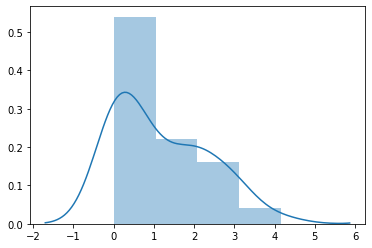

In [3]:
# plot variance between different sources
sns.distplot(std)

Total Confirmed Cases:57.0


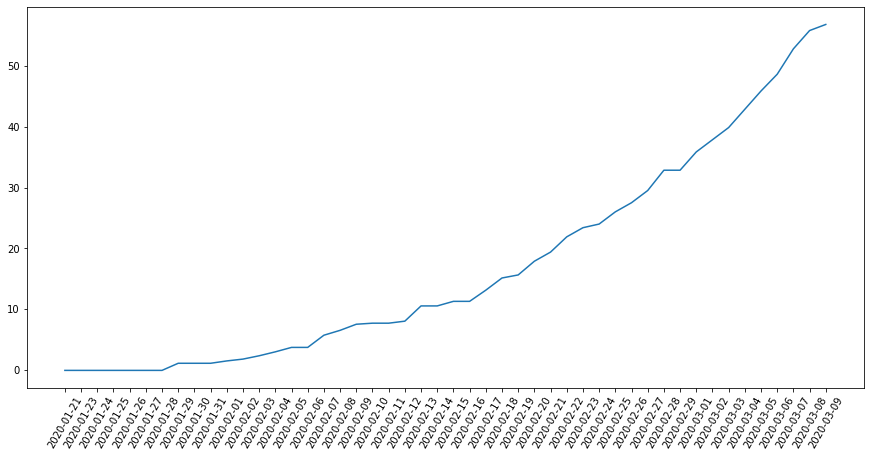

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(df['date'], df['confirmed_count'])
plt.xticks(rotation=60)
print('Total Confirmed Cases:' + str(round(df.loc[df.shape[0] - 1, 'confirmed_count'])))

In [5]:
df 

,date,confirmed_count
0,2020-01-21,0.000000
1,2020-01-23,0.000000
2,2020-01-24,0.000000
3,2020-01-25,0.000000
4,2020-01-26,0.000000
5,2020-01-27,0.000000
6,2020-01-28,0.000000
7,2020-01-29,1.166667
8,2020-01-30,1.166667
9,2020-01-31,1.166667
